<a href="https://colab.research.google.com/github/erisson23/AIEQ/blob/main/Car_Erisson_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow
import zipfile

In [ ]:
!gdown 17DeutH_Rzmw7J6Qdr9XdMFTRSH8v7VvY

Downloading...
From: https://drive.google.com/uc?id=17DeutH_Rzmw7J6Qdr9XdMFTRSH8v7VvY
To: /content/licence_plate.zip
100% 2.96M/2.96M [00:00<00:00, 130MB/s]


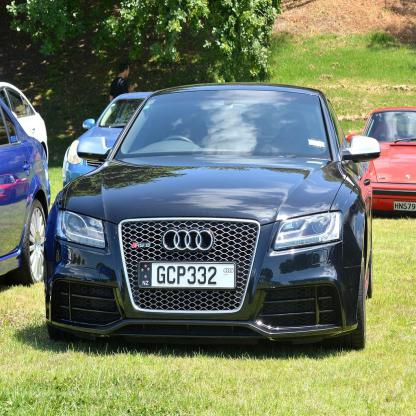

In [ ]:
FILE = 'licence_plate.zip'
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()
source= 'car_0006.jpg'	
img = cv2.imread(source)
cv2_imshow(img)

In [ ]:
scale_percent = 100 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

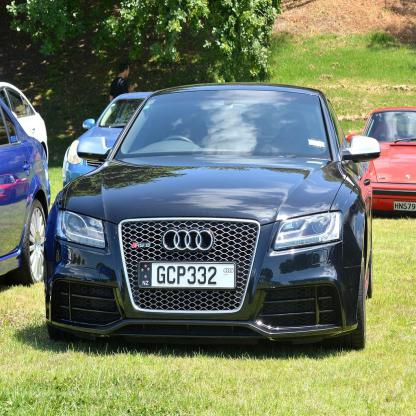

In [ ]:
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(img)

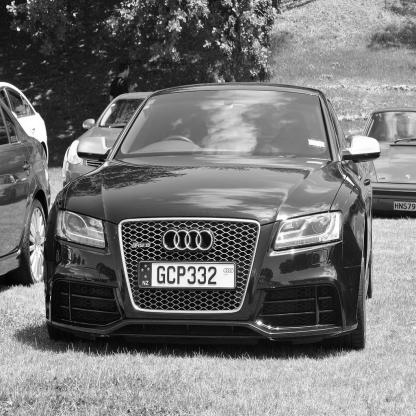

In [ ]:
cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(cinza)

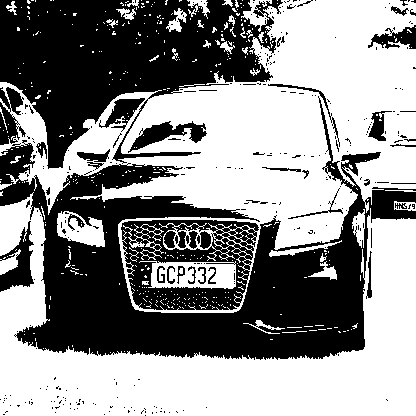

In [ ]:
test, bin = cv2.threshold(cinza, 110, 255, cv2.THRESH_BINARY)
cv2_imshow(bin)

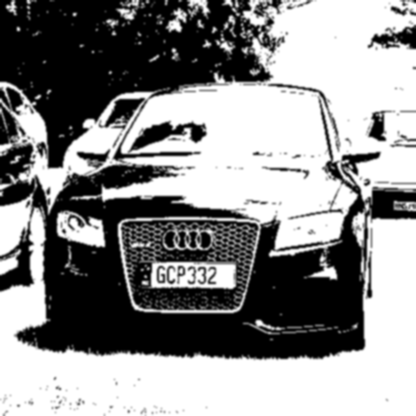

In [ ]:
desfoque = cv2.GaussianBlur(bin, (5, 5), 0)
cv2_imshow(desfoque)

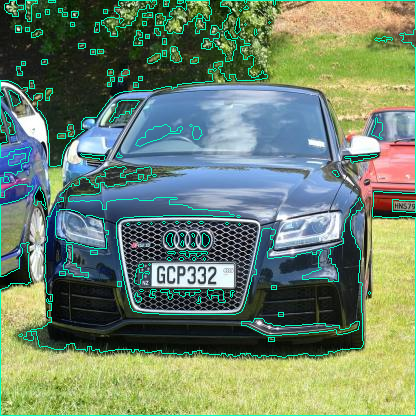

In [ ]:
contornos, hierarquia = cv2.findContours(desfoque, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contornos, -1, (190, 255, 0), 1)
cv2_imshow(img)

In [ ]:
for c in contornos:
    perimetro = cv2.arcLength(c, True)
    if perimetro > 120:
    #if perimetro > 100:
        aprox = cv2.approxPolyDP(c, 0.03 * perimetro, False)
        if len(aprox) == 4:
            (x, y, alt, lar) = cv2.boundingRect(c)
            cv2.rectangle(img, (x, y), (x + alt, y + lar), (0, 255, 0), 2)
            roi = img[y:y + lar, x:x + alt]
try:
  cv2_imshow( roi)
except:
  roi = img
  print('no roi image')
  cv2_imshow( roi)


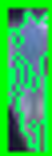

In [ ]:
resize_img_roi = cv2.resize(roi, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
cv2_imshow(resize_img_roi)


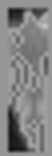

In [ ]:
img_cinza = cv2.cvtColor(resize_img_roi, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_cinza)

In [ ]:
resize_img_roi.shape

(156, 52, 3)

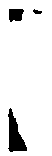

In [ ]:
_, img_binary = cv2.threshold(img_cinza, 70, 255, cv2.THRESH_BINARY)
cv2_imshow(img_binary)

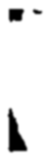

In [ ]:
img_desfoque = cv2.GaussianBlur(img_binary, (5, 5), 0)
img_ocr = img_desfoque
cv2_imshow(img_ocr)

In [ ]:
config = r'-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6'
texto = pytesseract.image_to_string(img_ocr, lang='eng', config=config)
print(texto)

L



In [ ]:

texto = pytesseract.image_to_string(bin, lang='eng', config=config)
print(texto)

PS

X
L
1
4 SA



In [ ]:
texto = pytesseract.image_to_string(desfoque, lang='eng', config=config)
print(texto)

Y

5
2 P
4 H



In [ ]:
texto = pytesseract.image_to_string(cinza, lang='eng', config=config)
print(texto)

R SS
BY
S

